In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\Final_Augmented_dataset_Diseases_and_Symptoms.csv')
df=df[df['diseases'].notnull()]
df

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\nihca\AppData\Local\Temp\ipykernel_9252\759877005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


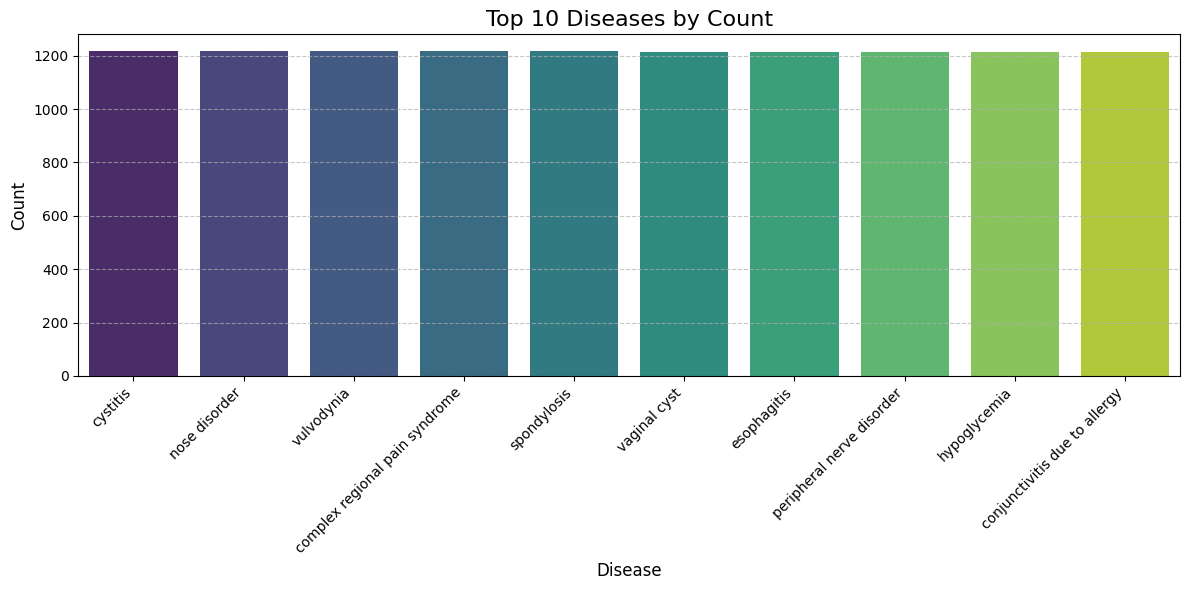

In [3]:
disease_counts = df['diseases'].value_counts().nlargest(10)
        

plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')
plt.title('Top 10 Diseases by Count', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

        
plt.show()
        

C:\Users\nihca\AppData\Local\Temp\ipykernel_9252\183940747.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


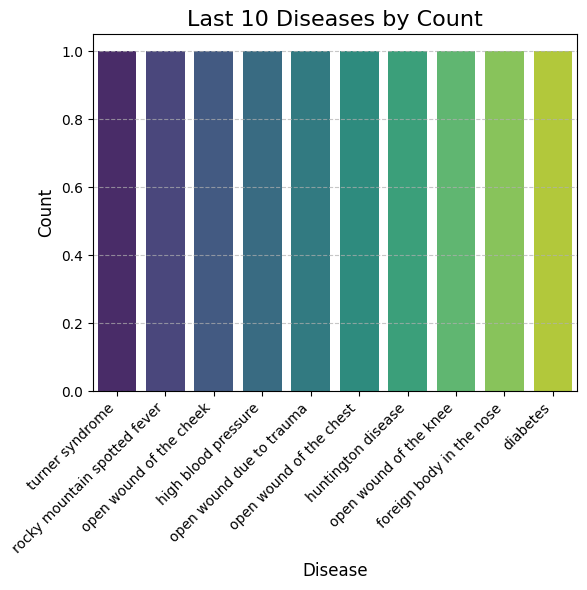

In [4]:
disease_counts = df['diseases'].value_counts().nsmallest(10)
        
plt.figure(figsize=(6, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')
plt.title('Last 10 Diseases by Count', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

"""for i, count in enumerate(disease_counts.values):
        plt.text(i, count + 5, str(count), ha='center', fontweight='bold')
"""
plt.show()

In [5]:
le=LabelEncoder()
df["diseases_encoded"]=le.fit_transform(df["diseases"])

In [6]:
df["diseases_encoded"]

0         531
1         531
2         531
3         531
4         531
         ... 
246940    506
246941    506
246942    506
246943    506
246944    506
Name: diseases_encoded, Length: 246945, dtype: int64

In [7]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df.drop(columns=["diseases","diseases_encoded"]))
scaled_data

array([[ 4.94844929, -0.21131779,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       [ 4.94844929,  4.73220926,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       ...,
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ]])

In [8]:
min_max_scaler = MinMaxScaler()

In [9]:
num_classes = df['diseases_encoded'].nunique()

y_onehot = tf.keras.utils.to_categorical(df['diseases_encoded'], num_classes=num_classes)

In [10]:

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['diseases_encoded']),
    y=df['diseases_encoded']
)
class_weight_dict = dict(enumerate(class_weights))

In [11]:
len(df['diseases_encoded'].unique())

773

In [12]:
class_weight_dict

{0: np.float64(2.3149502221722256),
 1: np.float64(0.7849216969527448),
 2: np.float64(1.1015970022750592),
 3: np.float64(16.813848982093006),
 4: np.float64(0.9368420253952116),
 5: np.float64(10.648771021992237),
 6: np.float64(8.873975851660198),
 7: np.float64(3.8031325078543707),
 8: np.float64(0.6440788924592079),
 9: np.float64(0.3514445881845623),
 10: np.float64(0.2653348261293747),
 11: np.float64(0.2633661423411106),
 12: np.float64(0.35260831198649795),
 13: np.float64(35.49590340664079),
 14: np.float64(1.5212530031417484),
 15: np.float64(0.3518316416957788),
 16: np.float64(0.4677351839820895),
 17: np.float64(0.2646753360892851),
 18: np.float64(0.7083439704207697),
 19: np.float64(0.35260831198649795),
 20: np.float64(0.35105838534040346),
 21: np.float64(4.3762072693118785),
 22: np.float64(0.6351155679120619),
 23: np.float64(9.12751801885049),
 24: np.float64(106.48771021992238),
 25: np.float64(0.6263982954113081),
 26: np.float64(0.910151369401046),
 27: np.float

In [ ]:
X = min_max_scaler.fit_transform(scaled_data)
y = y_onehot

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        48,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 773)            │        50,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,653 (420.52 KB)

 Trainable params: 107,269 (419.02 KB)

 Non-trainable params: 384 (1.50 KB)

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)



In [16]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/50


KeyboardInterrupt: 

NameError: name 'history' is not defined

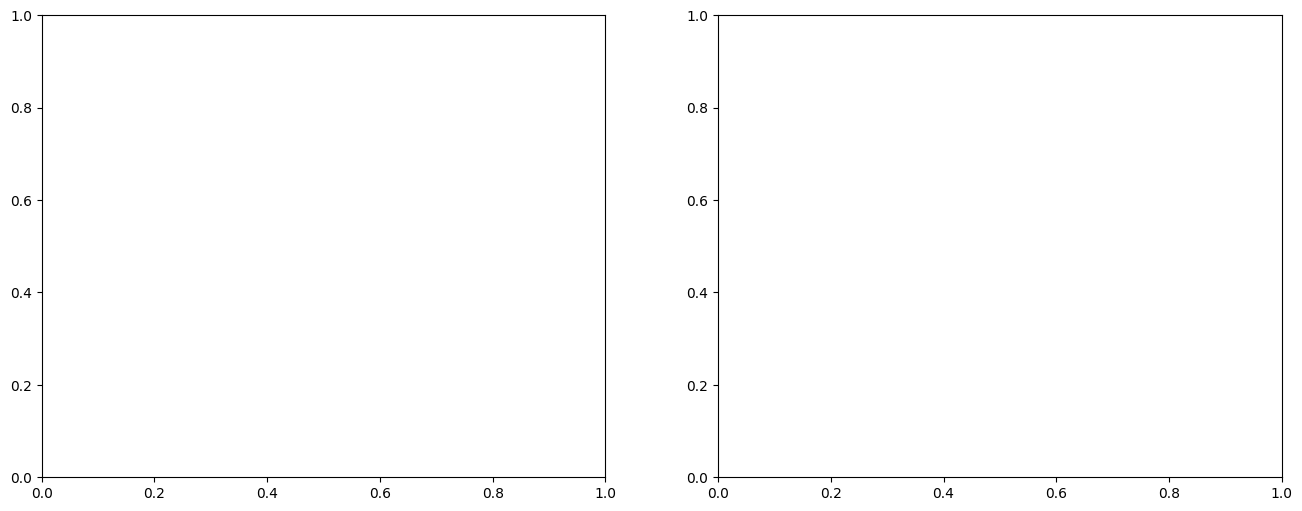

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='validation')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='validation')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save(r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\disease_classification_model.keras'
'')

joblib.dump(scaler, r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\standard_scaler.pkl')
joblib.dump(min_max_scaler, r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\min_max_scaler.pkl')
joblib.dump(le, r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\label_encoder.pkl')

